In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #overfit,outlier,imbalance data-robust(imblearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/anirudhakolay/House_Price_Prediction_RegressionModel/refs/heads/main/train.csv'
df = pd.read_csv(url)
df.sample(frac = 1) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
805,806,20,RL,91.0,12274,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,New,Partial,227680
822,823,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500
1059,1060,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000
796,797,20,RL,71.0,8197,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2007,WD,Normal,143500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
418,419,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand,126000
1245,1246,80,RL,78.0,12090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,178000
508,509,70,RM,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,161000


In [3]:
#Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

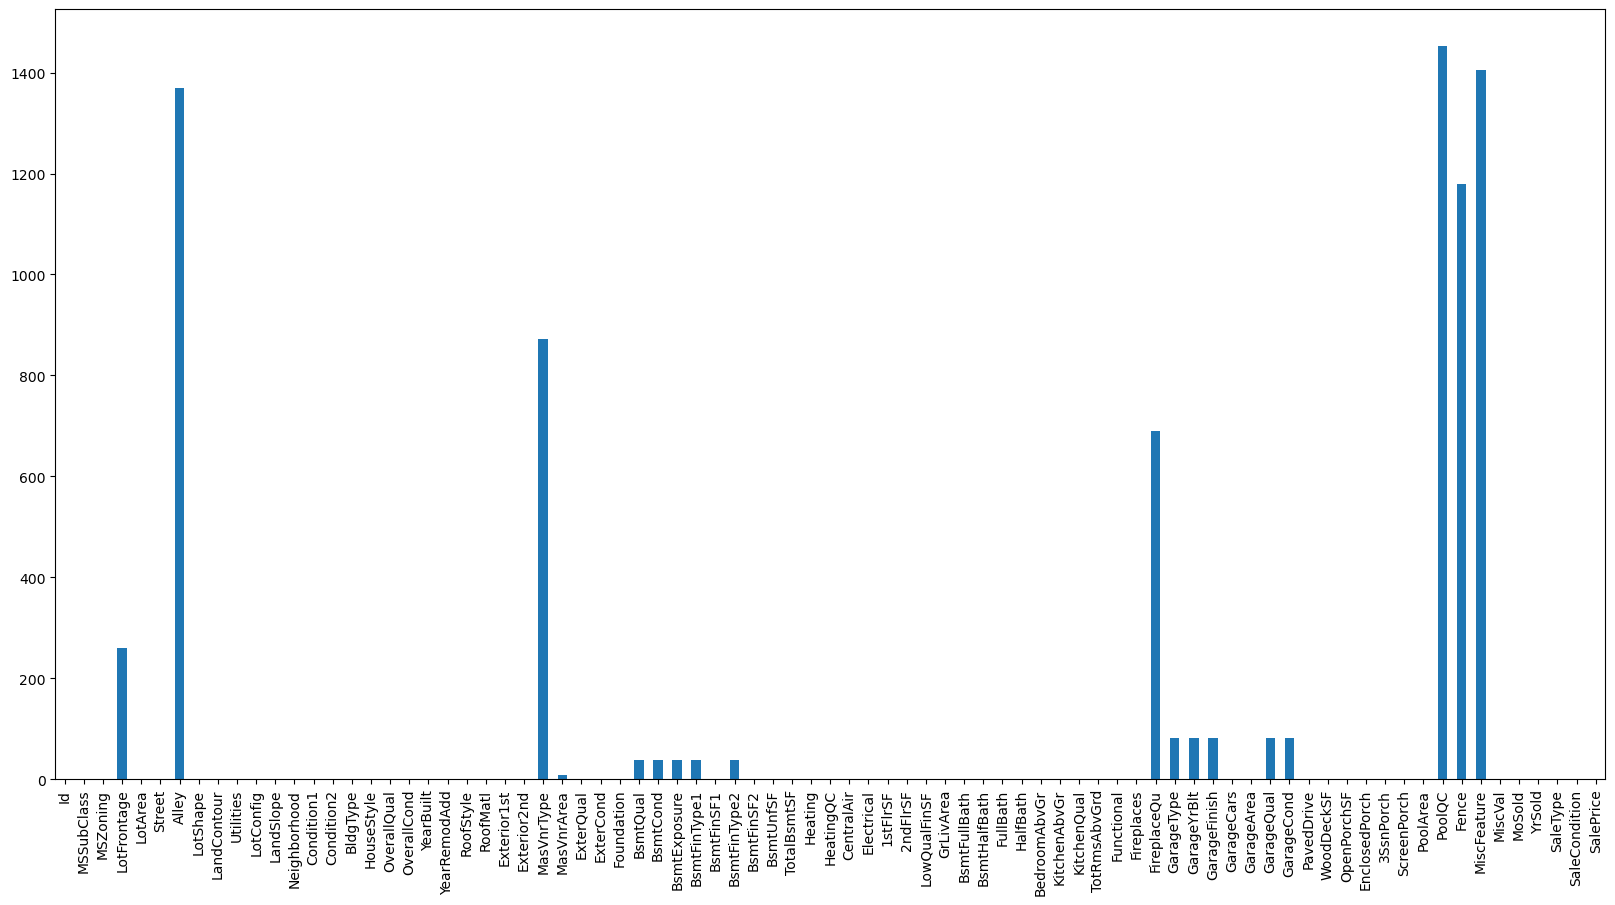

In [4]:
#Checking Null Values stats using Graphical method
df.isnull().sum().plot(kind = 'bar', figsize=(20, 10))

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'

In [8]:
# Exploratory Data Analysis
# Univariate Analysis

stats = []

from collections import OrderedDict

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feauture' : i,
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(), #spread of data
        'Standard Deviation' : df[i].std() # distance between mean and data point, under root variance
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feauture,Count,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,Id,1460,730.500000,730.5,1.0,1.0,1460.0,365.75,1095.25,729.50,421.610009,0.000000,-1.200000,1.777550e+05,421.610009
1,MSSubClass,1460,56.897260,50.0,20.0,20.0,190.0,20.00,70.00,50.00,42.300571,1.407657,1.580188,1.789338e+03,42.300571
2,LotFrontage,1201,70.049958,69.0,60.0,21.0,313.0,59.00,80.00,21.00,24.284752,2.163569,17.452867,5.897492e+02,24.284752
3,LotArea,1460,10516.828082,9478.5,7200.0,1300.0,215245.0,7553.50,11601.50,4048.00,9981.264932,12.207688,203.243271,9.962565e+07,9981.264932
4,OverallQual,1460,6.099315,6.0,5.0,1.0,10.0,5.00,7.00,2.00,1.382997,0.216944,0.096293,1.912679e+00,1.382997
5,OverallCond,1460,5.575342,5.0,5.0,1.0,9.0,5.00,6.00,1.00,1.112799,0.693067,1.106413,1.238322e+00,1.112799
6,YearBuilt,1460,1971.267808,1973.0,2006.0,1872.0,2010.0,1954.00,2000.00,46.00,30.202904,-0.613461,-0.439552,9.122154e+02,30.202904
7,YearRemodAdd,1460,1984.865753,1994.0,1950.0,1950.0,2010.0,1967.00,2004.00,37.00,20.645407,-0.503562,-1.272245,4.262328e+02,20.645407
8,MasVnrArea,1452,103.685262,0.0,0.0,0.0,1600.0,0.00,166.00,166.00,181.066207,2.669084,10.082417,3.278497e+04,181.066207
9,BsmtFinSF1,1460,443.639726,383.5,0.0,0.0,5644.0,0.00,712.25,712.25,456.098091,1.685503,11.118236,2.080255e+05,456.098091


In [9]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [10]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

In [11]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

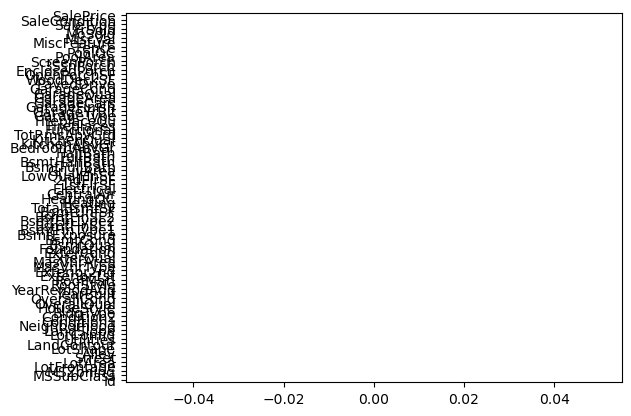

In [12]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [15]:
# Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column
X = df.drop(columns = ['SalePrice'],axis = 1)
y = df['SalePrice'] # target column
# Step 02: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Step 03: Scale the data
scaler = RobustScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for Random Forest', r2_score(y_test,y_pred_RF))

The Model Accuracy for Random Forest 0.8950691593703849


In [17]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
# Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and train the model
GB = GradientBoostingRegressor().fit(X_train, y_train)
# Make predictions
y_pred_GB = GB.predict(X_test)

# Evaluate the model
print('The Model Accuracy for Gradient Boosting:', r2_score(y_test, y_pred_GB))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_GB))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_GB))


The Model Accuracy for Gradient Boosting: 0.9044735398260078
Mean Absolute Error: 16466.535208838774
Mean Squared Error: 666592595.7447526


In [18]:
#Using XgBoost Algorithm
# pip install xgboost
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor', r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9014540267515899


In [19]:
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 400, 500],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    error_score='raise'  # Will raise exceptions immediately if any fit fails
)

#Fit to training data
random_search.fit(X_train,y_train)

#Best Model
best_rf = random_search.best_estimator_
print('Best Parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_*100)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best R2 Score on CV: 83.9545006093083


In [20]:
#Applying those parameters on the xgboost model
import xgboost as xg

xgb = xg.XGBRegressor(
    subsample=0.6,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=300,
    min_child_weight=4,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=0.7,
    random_state=42,
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print('Model Accuracy for XGBoost Regressor with the Hyperparameters:', r2_score(y_test, y_pred_xgb)*100)

Model Accuracy for XGBoost Regressor with the Hyperparameters: 92.12367289761177


In [21]:
#Hyperparameter tuning for the xgboost model
from sklearn.model_selection import RandomizedSearchCV

XGB = xg.XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

random_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_dist,
    n_iter=50,              
    scoring='r2',
    cv=5,                   
    random_state=42,
    n_jobs=-1               
)
random_search.fit(X_train,y_train)

best_rf = random_search.best_estimator_
print('Best Parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_*100)

Best Parameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best R2 Score on CV: 83.0563882445207
